In [24]:
import pandas as pd


In [19]:
df = pd.read_csv("data/archive-2/Child 1 Genome.csv",low_memory=False)
df1 = pd.read_csv("data/archive-2/Child 2 Genome.csv",low_memory=False)
df2 = pd.read_csv("data/archive-2/Child 3 Genome.csv",low_memory=False)

df3 = pd.read_csv("data/archive-2/Father Genome.csv",low_memory=False)
df4 = pd.read_csv("data/archive-2/Mother Genome.csv",low_memory=False)

In [26]:
# Importar librer√≠as para an√°lisis y visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de estilos para visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [27]:
# Crear diccionario con todos los genomas
genomes = {
    'Child 1': df,
    'Child 2': df1,
    'Child 3': df2,
    'Father': df3,
    'Mother': df4
}

# Informaci√≥n b√°sica de cada dataset
for name, dataset in genomes.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {name}")
    print(f"{'='*60}")
    print(f"Dimensiones: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")
    print(f"\nValores nulos por columna:")
    print(dataset.isnull().sum())


DATASET: Child 1
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


# rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AG
4  rs115093905          1    787173       GG


Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 2
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 2
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


# rsid chromosome  position genotype
0  rs548049170          1     69869       TT
1    rs9283150          1    565508       AA
2  rs116587930          1    727841       GG
3    rs3131972          1    752721       GG
4   rs12184325          1    754105       CC


Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 3
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


# rsid chromosome  position genotype
0  rs548049170          1     69869       TT
1    rs9283150          1    565508       AA
2  rs116587930          1    727841       GG
3    rs3131972          1    752721       GG
4   rs12184325          1    754105       CC


Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Father
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Father
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


# rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AA
4  rs115093905          1    787173       GG


Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Mother
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


# rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       GG
2  rs148828841          1    760998       CC
3   rs12124819          1    776546       AG
4  rs115093905          1    787173       GG


Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64


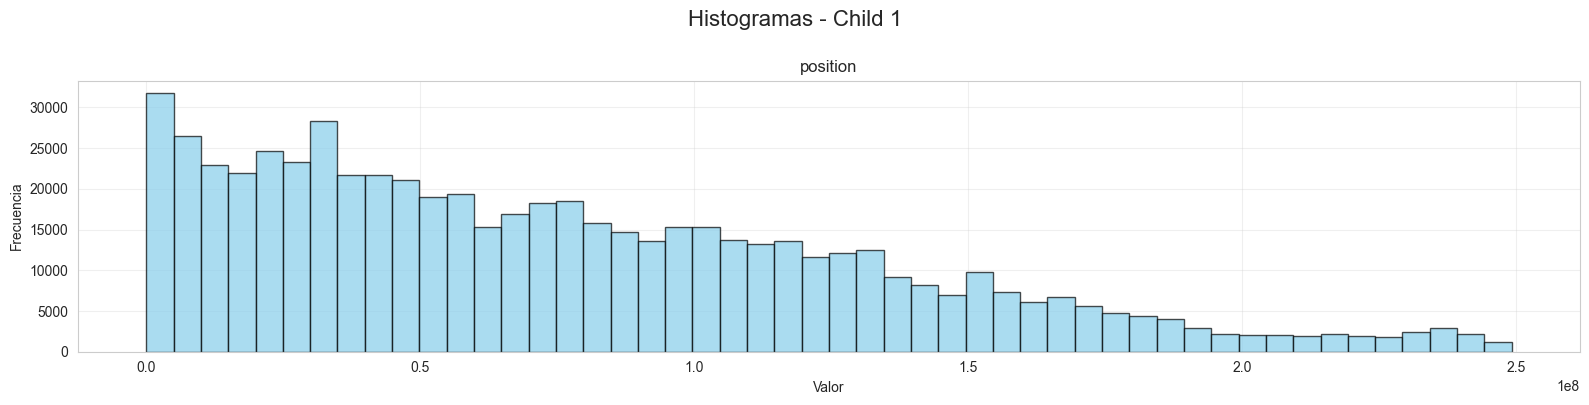

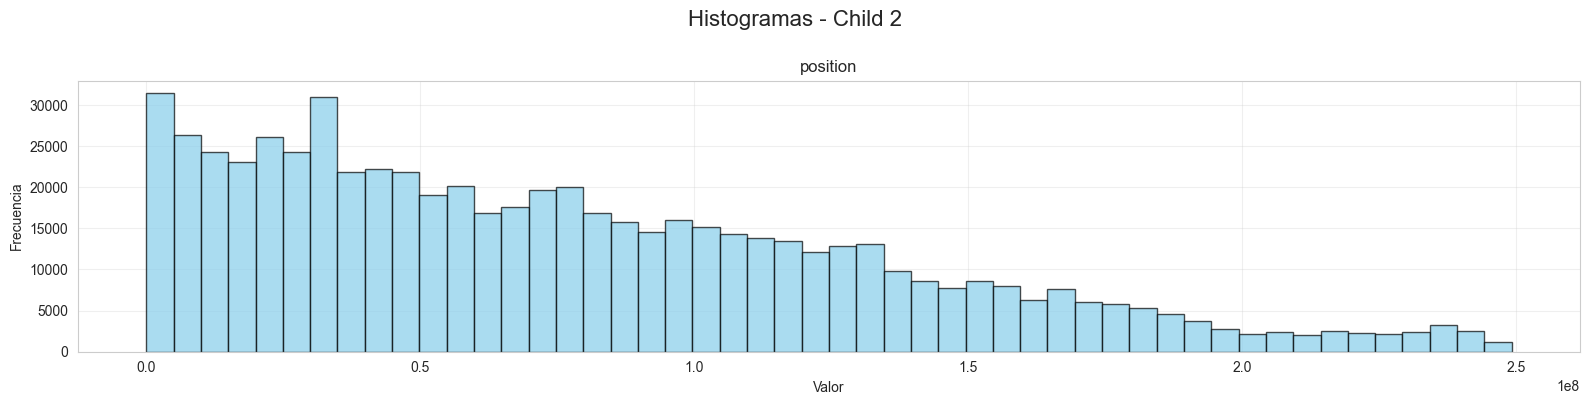

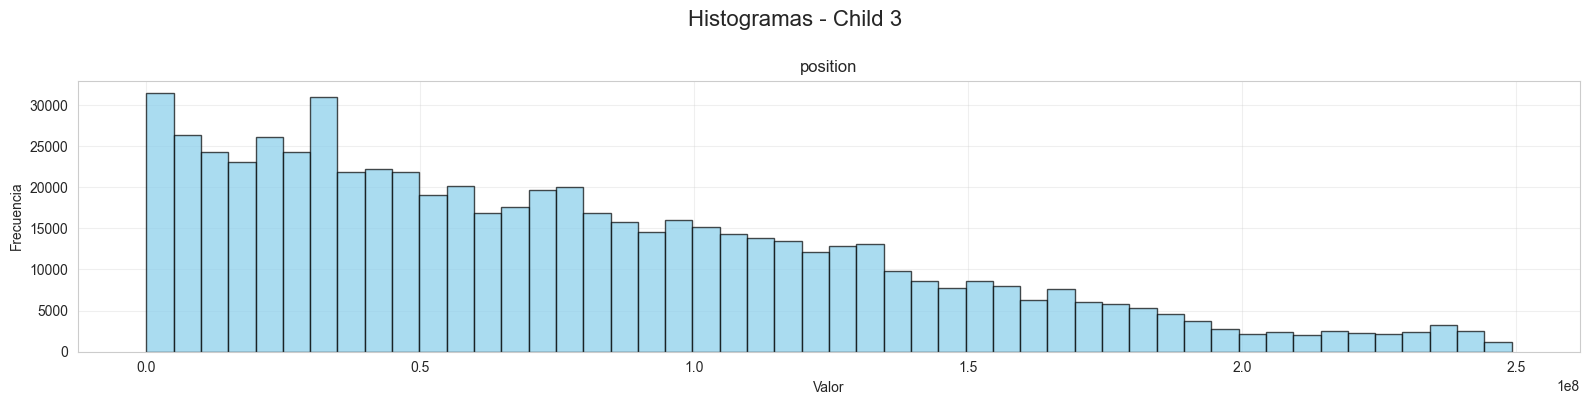

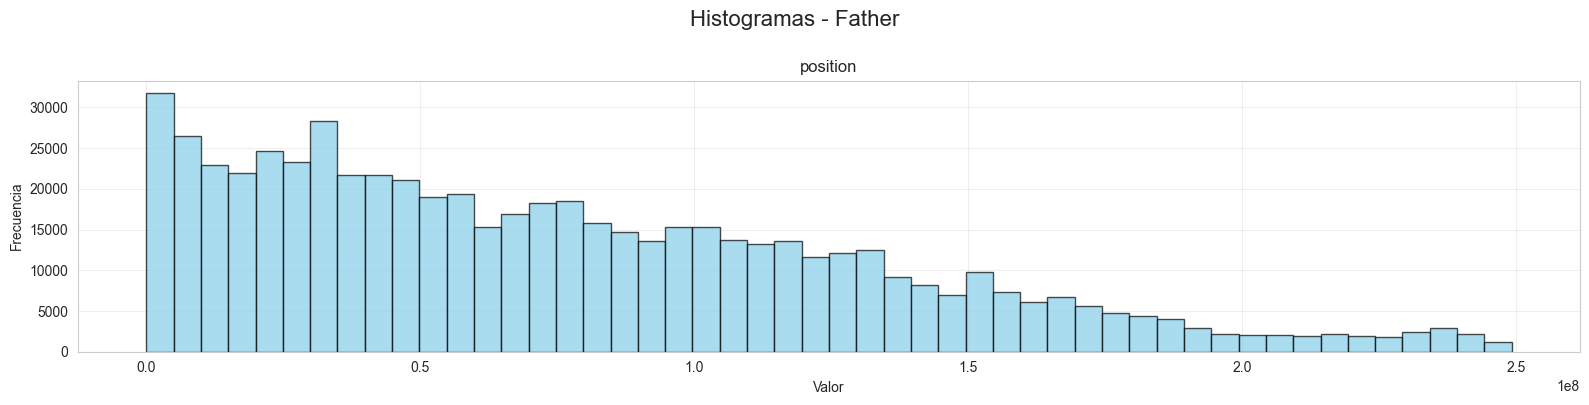

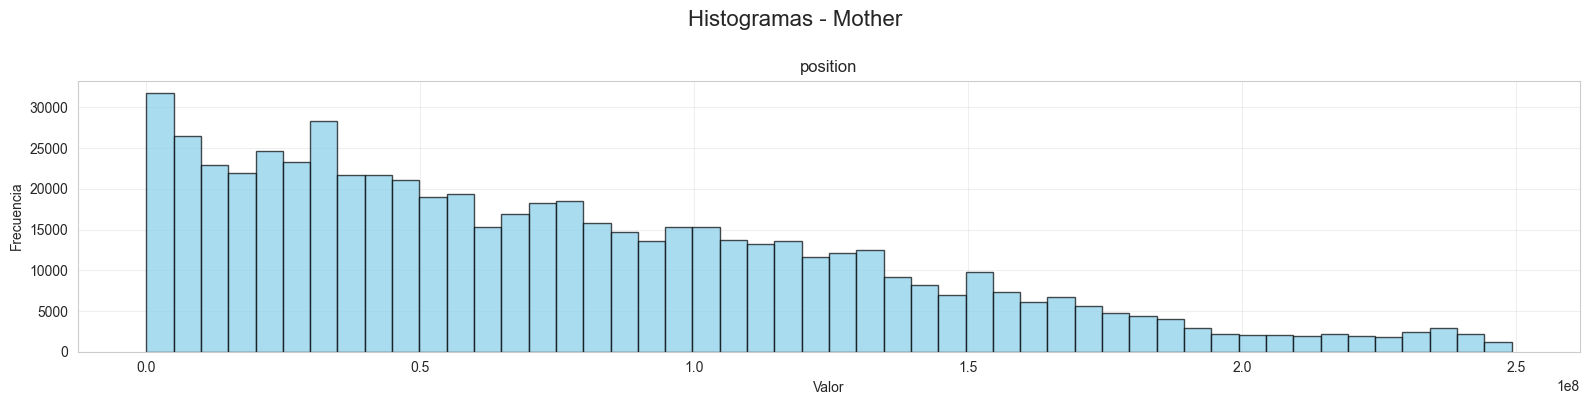

In [29]:
# Histogramas para variables num√©ricas de todos los genomas
for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Histogramas - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                # Histograma con curva de densidad
                axes[idx].hist(dataset[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
                axes[idx].set_title(f'{col}', fontsize=12)
                axes[idx].set_xlabel('Valor')
                axes[idx].set_ylabel('Frecuencia')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vac√≠os
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

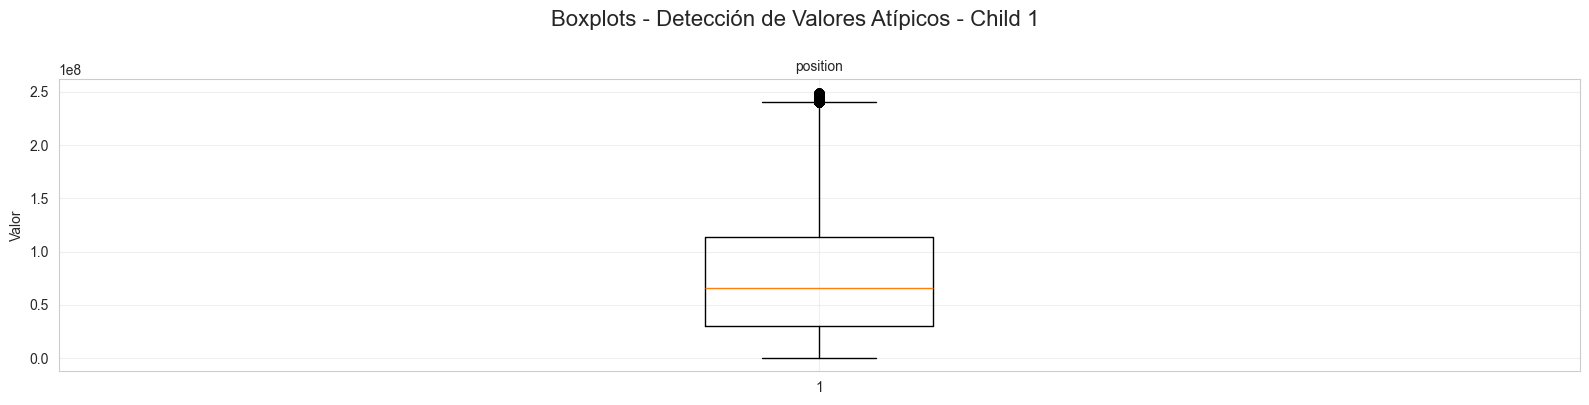

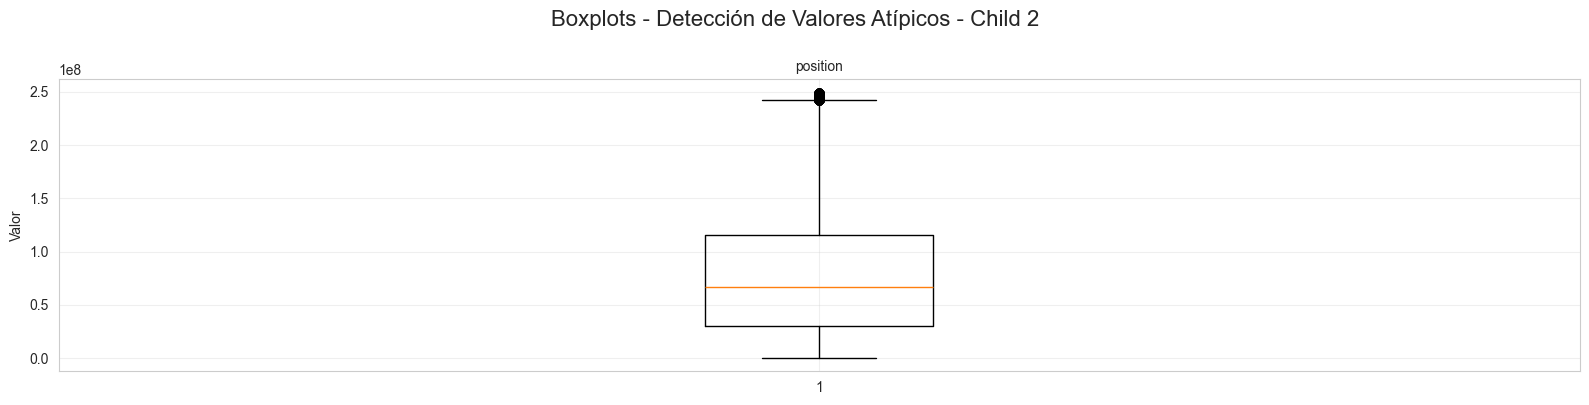

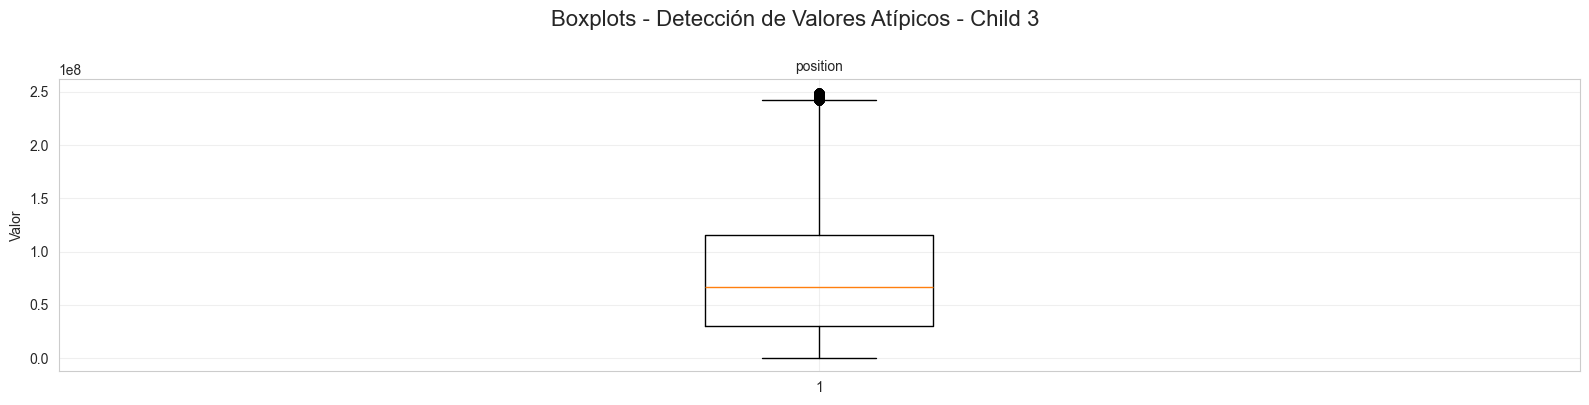

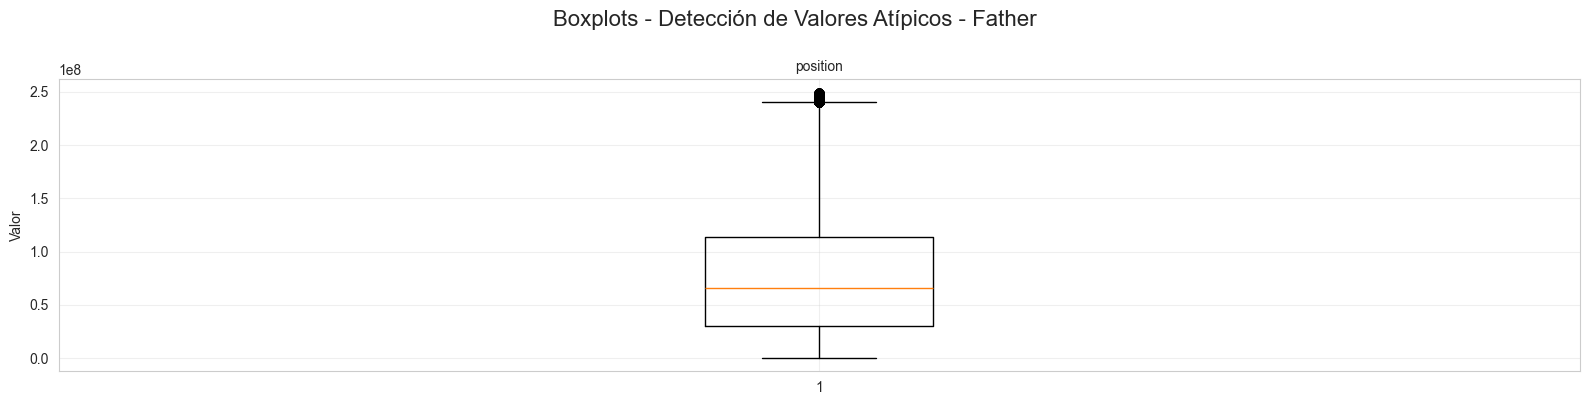

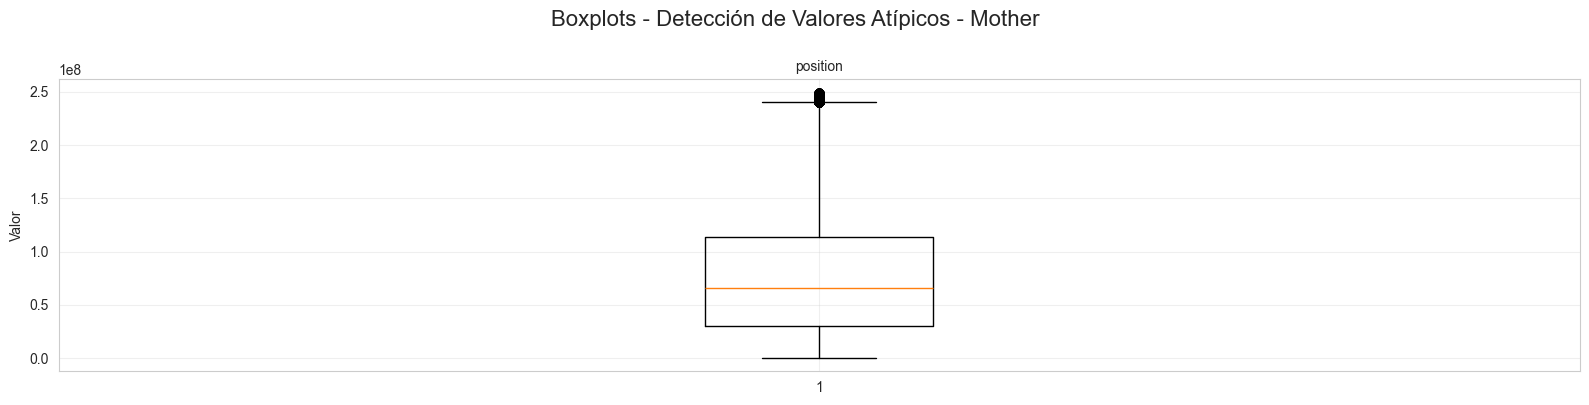

In [31]:
# Boxplots para detectar valores at√≠picos
for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Boxplots - Detecci√≥n de Valores At√≠picos - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                data = dataset[col].dropna()
                axes[idx].boxplot(data, vert=True)
                axes[idx].set_title(f'{col}', fontsize=10)
                axes[idx].set_ylabel('Valor')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vac√≠os
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

<Axes: xlabel='genotype'>

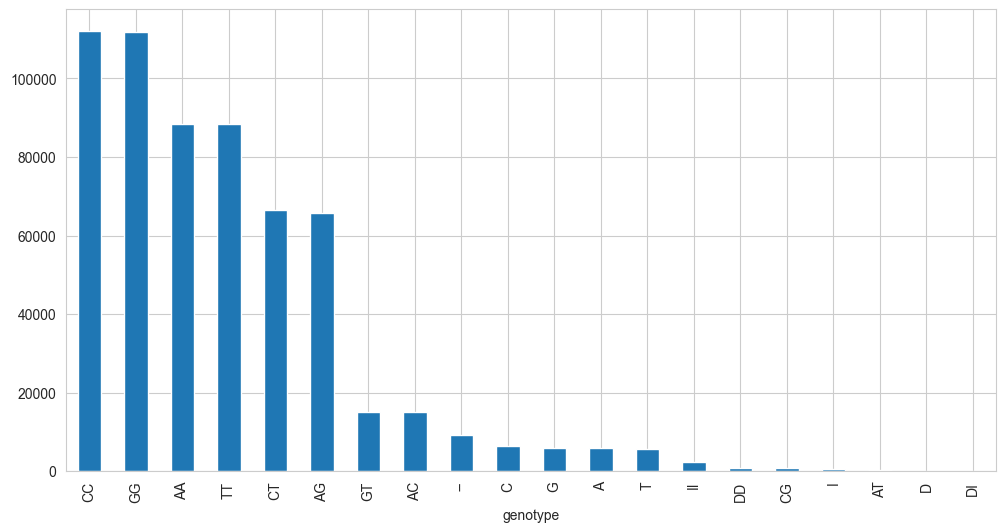

In [62]:
df['genotype'].value_counts().plot(kind='bar')


<Axes: xlabel='genotype'>

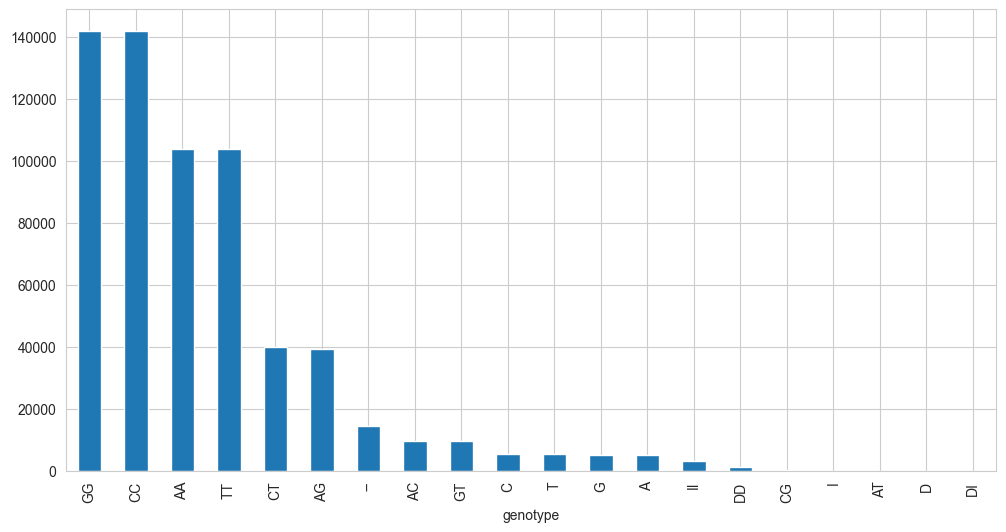

In [63]:
df1['genotype'].value_counts().plot(kind='bar')


<Axes: xlabel='genotype'>

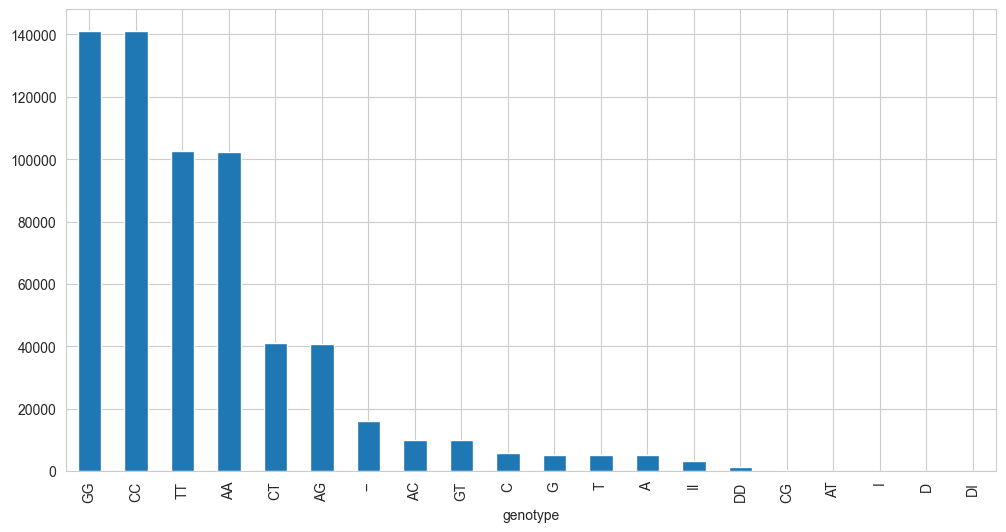

In [64]:
df2['genotype'].value_counts().plot(kind='bar')

<Axes: xlabel='genotype'>

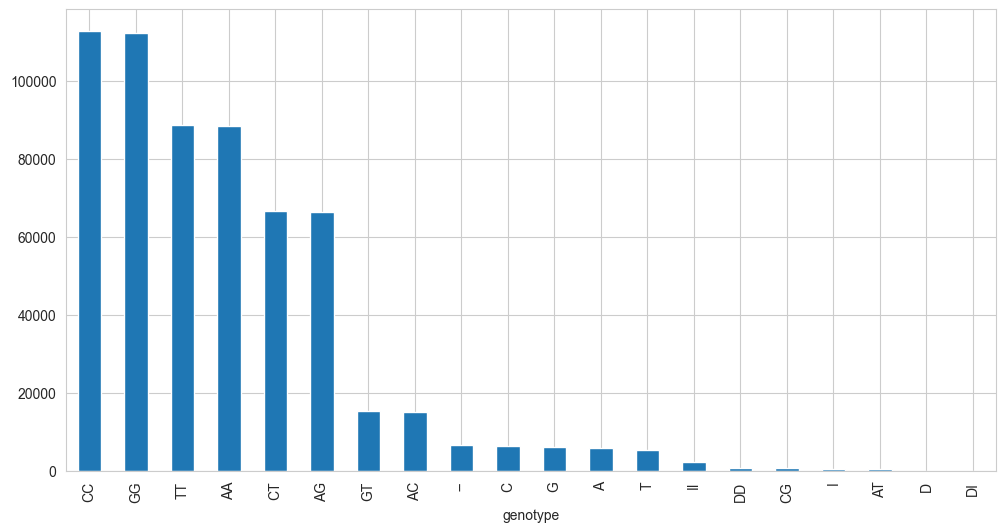

In [65]:
df3['genotype'].value_counts().plot(kind='bar')

<Axes: xlabel='genotype'>

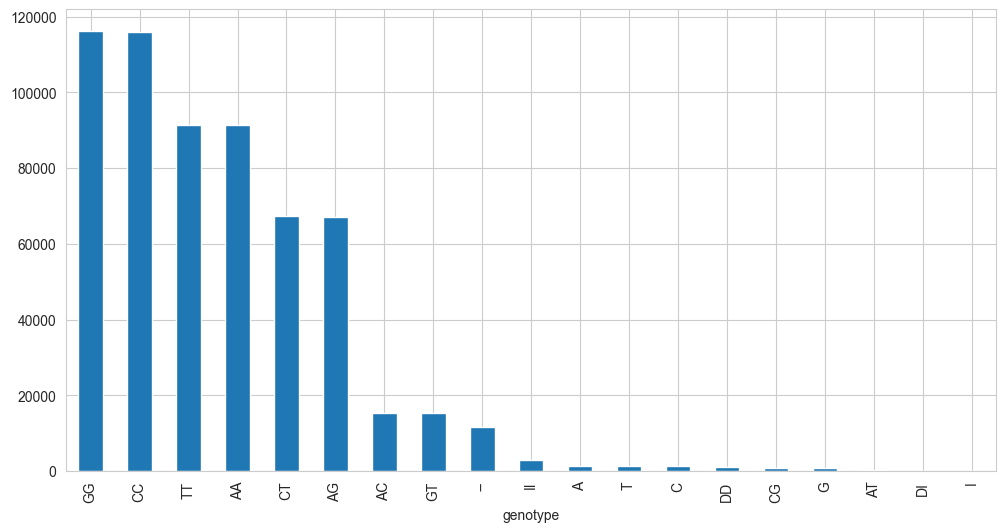

In [66]:
df4['genotype'].value_counts().plot(kind='bar')

# AN√ÅLISIS DE HERENCIA GEN√âTICA
## Relaci√≥n entre genomas de hijos y padres

Vamos a analizar:
1. Similitud gen√©tica entre cada hijo y sus padres
2. Herencia de variantes gen√©ticas
3. Patrones de herencia mendeliana

In [67]:
# Primero, exploremos las columnas disponibles en los datasets
print("Columnas en el dataset Child 1:")
print(df.columns.tolist())
print(f"\nN√∫mero de columnas: {len(df.columns)}")
print(f"\nPrimeras filas:")
print(df.head())

Columnas en el dataset Child 1:
['# rsid', 'chromosome', 'position', 'genotype']

N√∫mero de columnas: 4

Primeras filas:
        # rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AG
4  rs115093905          1    787173       GG


## 1. An√°lisis de Similitud Gen√©tica

Calculamos qu√© porcentaje de variantes gen√©ticas comparten los hijos con cada padre.

In [68]:
# Funci√≥n para calcular similitud entre dos genomas
def calculate_similarity(child_df, parent_df):
    """
    Calcula la similitud gen√©tica entre hijo y padre basada en:
    1. SNPs compartidos (mismo rsid y posici√≥n)
    2. Genotipos id√©nticos
    3. Genotipos parcialmente compatibles (un alelo en com√∫n)
    """
    # Merge por rsid y posici√≥n para encontrar SNPs comunes
    merged = pd.merge(child_df, parent_df, on=['# rsid', 'chromosome', 'position'], 
                      suffixes=('_child', '_parent'))
    
    total_snps = len(merged)
    
    # Genotipos id√©nticos
    identical = (merged['genotype_child'] == merged['genotype_parent']).sum()
    
    # Genotipos parcialmente compatibles (al menos un alelo en com√∫n)
    # Por ejemplo: hijo AG con padre AA (A en com√∫n)
    partial_match = 0
    for idx, row in merged.iterrows():
        child_gt = set(row['genotype_child'])
        parent_gt = set(row['genotype_parent'])
        if len(child_gt.intersection(parent_gt)) > 0 and row['genotype_child'] != row['genotype_parent']:
            partial_match += 1
    
    return {
        'total_snps': total_snps,
        'identical_genotypes': identical,
        'partial_match': partial_match,
        'pct_identical': (identical / total_snps * 100) if total_snps > 0 else 0,
        'pct_compatible': ((identical + partial_match) / total_snps * 100) if total_snps > 0 else 0
    }

# Calcular similitud para cada hijo con cada padre
children_data = [('Child 1', df), ('Child 2', df1), ('Child 3', df2)]
parents_data = [('Father', df3), ('Mother', df4)]

results = []

for child_name, child_df in children_data:
    for parent_name, parent_df in parents_data:
        sim = calculate_similarity(child_df, parent_df)
        results.append({
            'Child': child_name,
            'Parent': parent_name,
            'Total SNPs Comunes': sim['total_snps'],
            'Genotipos Id√©nticos': sim['identical_genotypes'],
            'Compatibles Parciales': sim['partial_match'],
            '% Id√©nticos': round(sim['pct_identical'], 2),
            '% Compatibles': round(sim['pct_compatible'], 2)
        })

similarity_df = pd.DataFrame(results)
print(similarity_df.to_string(index=False))

  Child Parent  Total SNPs Comunes  Genotipos Id√©nticos  Compatibles Parciales  % Id√©nticos  % Compatibles
Child 1 Father              601802               426892                 163911        70.94          98.17
Child 1 Mother              601802               407760                 181879        67.76          97.98
Child 2 Father              116199                78929                  34219        67.93          97.37
Child 2 Mother              116199                76103                  37058        65.49          97.39
Child 3 Father              116199                78933                  34313        67.93          97.46
Child 3 Mother              116199                76107                  37124        65.50          97.45


## 2. Visualizaci√≥n de Similitud Gen√©tica

Graficamos los resultados para ver claramente la relaci√≥n de cada hijo con sus padres.

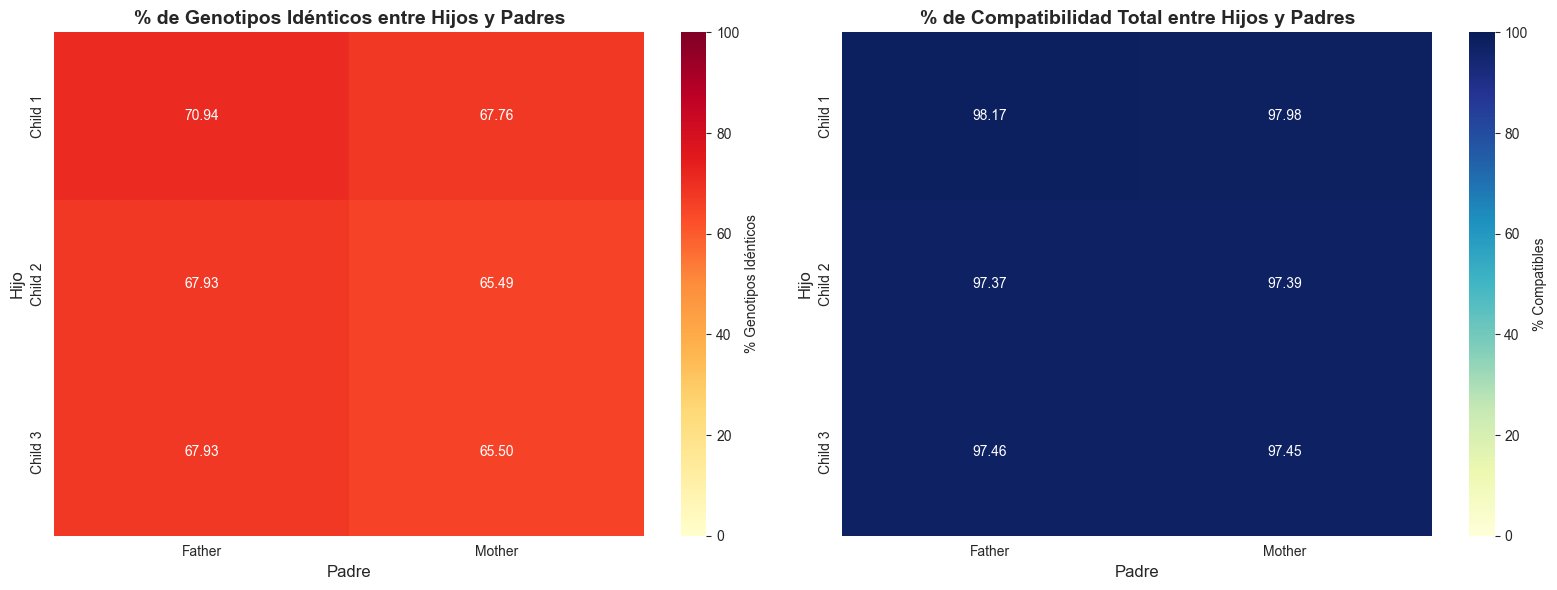

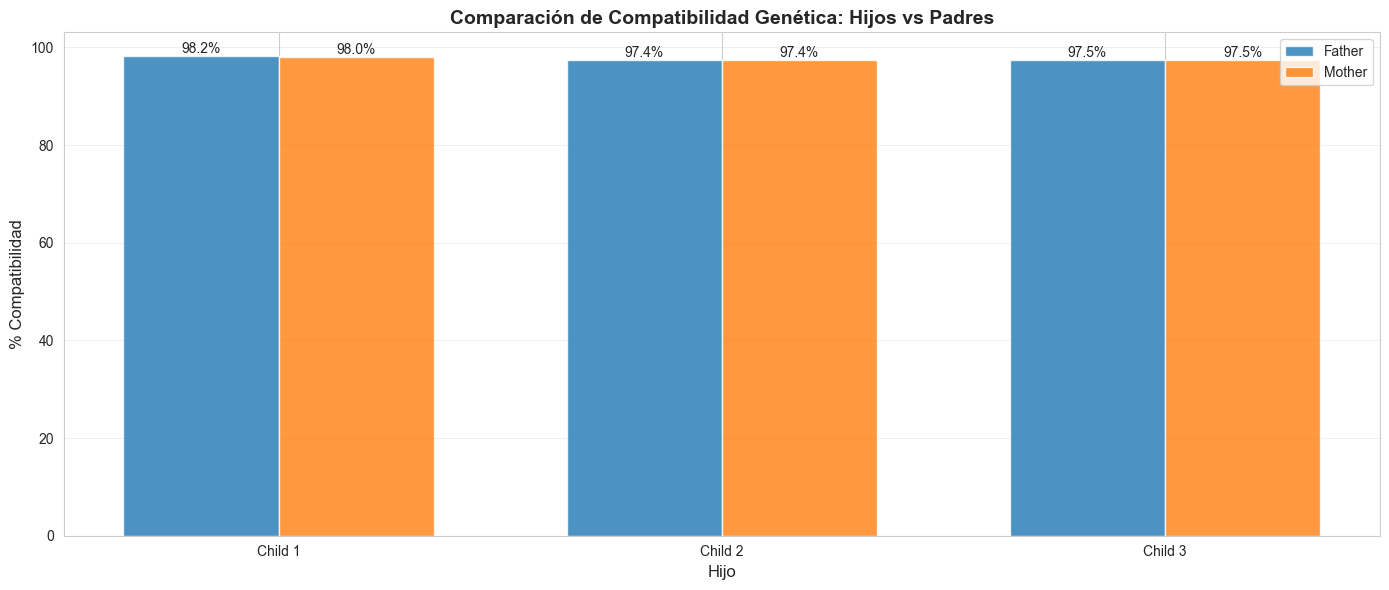

In [69]:
# Visualizaci√≥n de similitud gen√©tica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico 1: Genotipos Id√©nticos
pivot_identical = similarity_df.pivot(index='Child', columns='Parent', values='% Id√©nticos')
sns.heatmap(pivot_identical, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1, 
            cbar_kws={'label': '% Genotipos Id√©nticos'}, vmin=0, vmax=100)
ax1.set_title('% de Genotipos Id√©nticos entre Hijos y Padres', fontsize=14, fontweight='bold')
ax1.set_ylabel('Hijo', fontsize=12)
ax1.set_xlabel('Padre', fontsize=12)

# Gr√°fico 2: Compatibilidad Total (id√©nticos + parciales)
pivot_compatible = similarity_df.pivot(index='Child', columns='Parent', values='% Compatibles')
sns.heatmap(pivot_compatible, annot=True, fmt='.2f', cmap='YlGnBu', ax=ax2,
            cbar_kws={'label': '% Compatibles'}, vmin=0, vmax=100)
ax2.set_title('% de Compatibilidad Total entre Hijos y Padres', fontsize=14, fontweight='bold')
ax2.set_ylabel('Hijo', fontsize=12)
ax2.set_xlabel('Padre', fontsize=12)

plt.tight_layout()
plt.show()

# Gr√°fico de barras comparativo
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(similarity_df['Child'].unique()))
width = 0.35

for i, parent in enumerate(['Father', 'Mother']):
    parent_data = similarity_df[similarity_df['Parent'] == parent]
    offset = width * (i - 0.5)
    bars = ax.bar(x + offset, parent_data['% Compatibles'], width, 
                   label=parent, alpha=0.8)
    
    # A√±adir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Hijo', fontsize=12)
ax.set_ylabel('% Compatibilidad', fontsize=12)
ax.set_title('Comparaci√≥n de Compatibilidad Gen√©tica: Hijos vs Padres', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(similarity_df['Child'].unique())
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. An√°lisis de Herencia por Cromosoma

Analizamos c√≥mo se distribuye la herencia gen√©tica a trav√©s de los diferentes cromosomas.

In [70]:
# An√°lisis de herencia por cromosoma
def analyze_inheritance_by_chromosome(child_df, father_df, mother_df, child_name):
    """
    Analiza la herencia gen√©tica por cromosoma
    """
    results = []
    
    # Obtener cromosomas √∫nicos
    chromosomes = sorted(child_df['chromosome'].unique())
    
    for chrom in chromosomes:
        # Filtrar por cromosoma
        child_chrom = child_df[child_df['chromosome'] == chrom]
        father_chrom = father_df[father_df['chromosome'] == chrom]
        mother_chrom = mother_df[mother_df['chromosome'] == chrom]
        
        # Merge con padre
        merged_father = pd.merge(child_chrom, father_chrom, 
                                on=['# rsid', 'chromosome', 'position'], 
                                suffixes=('_child', '_father'))
        identical_father = (merged_father['genotype_child'] == merged_father['genotype_father']).sum()
        
        # Merge con madre
        merged_mother = pd.merge(child_chrom, mother_chrom, 
                                on=['# rsid', 'chromosome', 'position'], 
                                suffixes=('_child', '_mother'))
        identical_mother = (merged_mother['genotype_child'] == merged_mother['genotype_mother']).sum()
        
        total_snps = len(child_chrom)
        
        results.append({
            'Chromosome': chrom,
            'Total SNPs': total_snps,
            'From Father (%)': round((identical_father / len(merged_father) * 100) if len(merged_father) > 0 else 0, 2),
            'From Mother (%)': round((identical_mother / len(merged_mother) * 100) if len(merged_mother) > 0 else 0, 2)
        })
    
    return pd.DataFrame(results)

# Analizar cada hijo
print("="*80)
print("AN√ÅLISIS DE HERENCIA POR CROMOSOMA")
print("="*80)

for child_name, child_df in children_data:
    print(f"\n{child_name}:")
    inheritance_chrom = analyze_inheritance_by_chromosome(child_df, df3, df4, child_name)
    print(inheritance_chrom.to_string(index=False))
    print()

AN√ÅLISIS DE HERENCIA POR CROMOSOMA

Child 1:
Chromosome  Total SNPs  From Father (%)  From Mother (%)
         1       46656            71.58            70.92
        10       29211            69.68            69.46
        11       29320            70.98            71.23
        12       28450            72.25            70.07
        13       21652            71.30            70.04
        14       18695            69.24            69.90
        15       18281            69.80            68.71
        16       19198            71.50            71.09
        17       18710            74.16            72.57
        18       16490            71.29            68.63
        19       12989            74.17            73.32
         2       46127            69.16            69.81
        20       14494            69.93            69.29
        21        8461            68.76            67.98
        22        9096            70.56            71.08
         3       38516            69.81   

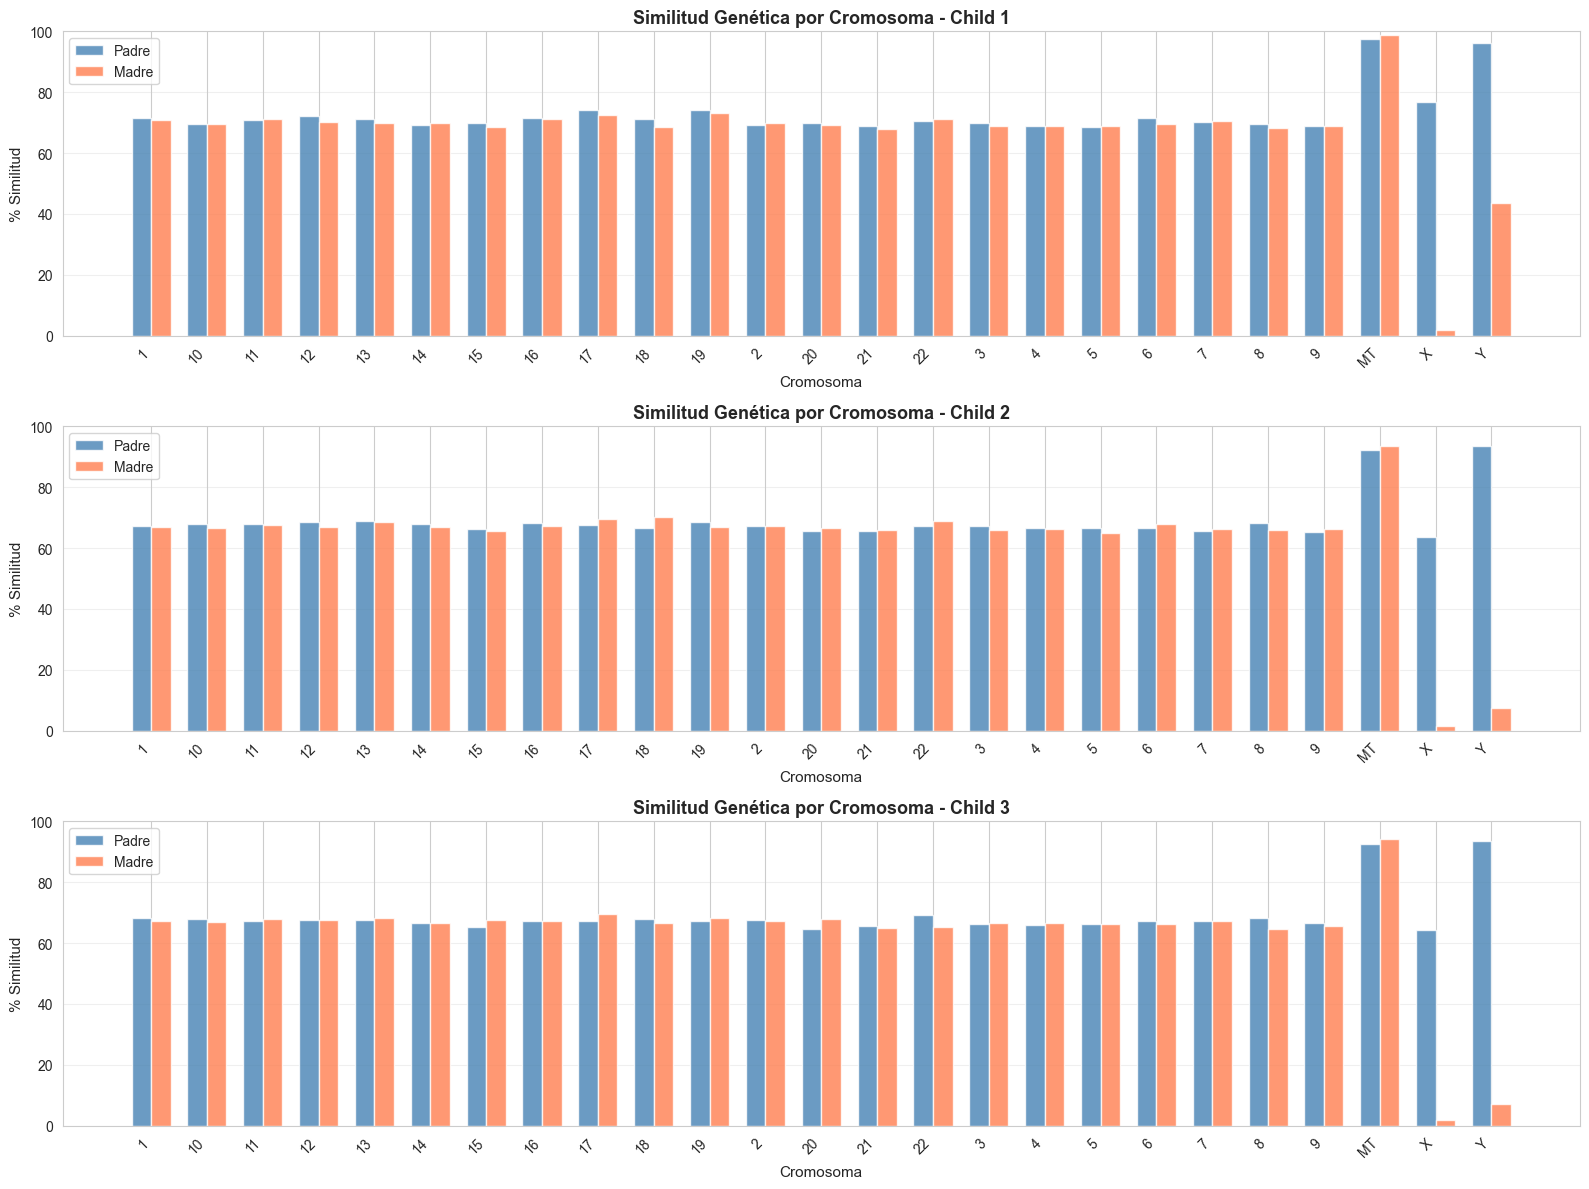

In [71]:
# Visualizaci√≥n de herencia por cromosoma
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for idx, (child_name, child_df) in enumerate(children_data):
    inheritance_chrom = analyze_inheritance_by_chromosome(child_df, df3, df4, child_name)
    
    x = np.arange(len(inheritance_chrom))
    width = 0.35
    
    bars1 = axes[idx].bar(x - width/2, inheritance_chrom['From Father (%)'], 
                          width, label='Padre', color='steelblue', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, inheritance_chrom['From Mother (%)'], 
                          width, label='Madre', color='coral', alpha=0.8)
    
    axes[idx].set_xlabel('Cromosoma', fontsize=11)
    axes[idx].set_ylabel('% Similitud', fontsize=11)
    axes[idx].set_title(f'Similitud Gen√©tica por Cromosoma - {child_name}', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(inheritance_chrom['Chromosome'], rotation=45, ha='right')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 4. An√°lisis de Patrones de Herencia Mendeliana

Verificamos si los genotipos de los hijos siguen las leyes de Mendel bas√°ndonos en los genotipos de los padres.

In [72]:
# Funci√≥n para validar herencia mendeliana
def validate_mendelian_inheritance(child_gt, father_gt, mother_gt):
    """
    Verifica si el genotipo del hijo es compatible con la herencia mendeliana
    dados los genotipos de los padres.
    
    Retorna:
    - 'Compatible': El genotipo del hijo puede provenir de los alelos de los padres
    - 'No Compatible': El genotipo del hijo no puede explicarse por los padres
    """
    # Convertir genotipos a sets de alelos
    child_alleles = set(child_gt)
    father_alleles = set(father_gt)
    mother_alleles = set(mother_gt)
    
    # El hijo debe tener alelos que puedan provenir de ambos padres
    # Cada alelo del hijo debe estar presente en al menos uno de los padres
    for allele in child_alleles:
        if allele not in father_alleles and allele not in mother_alleles:
            return 'No Compatible'
    
    return 'Compatible'

# An√°lisis de herencia mendeliana para cada hijo
def analyze_mendelian_patterns(child_df, father_df, mother_df, child_name):
    """
    Analiza qu√© porcentaje de SNPs siguen patrones de herencia mendeliana
    """
    # Merge de los tres genomas
    merged = pd.merge(child_df, father_df, on=['# rsid', 'chromosome', 'position'], 
                     suffixes=('_child', '_father'))
    merged = pd.merge(merged, mother_df, on=['# rsid', 'chromosome', 'position'])
    merged.rename(columns={'genotype': 'genotype_mother'}, inplace=True)
    
    # Validar cada SNP
    merged['mendelian_status'] = merged.apply(
        lambda row: validate_mendelian_inheritance(
            row['genotype_child'], 
            row['genotype_father'], 
            row['genotype_mother']
        ), axis=1
    )
    
    compatible = (merged['mendelian_status'] == 'Compatible').sum()
    total = len(merged)
    
    return {
        'child': child_name,
        'total_snps': total,
        'compatible': compatible,
        'not_compatible': total - compatible,
        'pct_compatible': round((compatible / total * 100) if total > 0 else 0, 2)
    }

# Analizar cada hijo
mendelian_results = []
print("="*80)
print("AN√ÅLISIS DE HERENCIA MENDELIANA")
print("="*80)
print("\nValidando si los genotipos de los hijos son compatibles con los de sus padres...\n")

for child_name, child_df in children_data:
    result = analyze_mendelian_patterns(child_df, df3, df4, child_name)
    mendelian_results.append(result)
    print(f"{child_name}:")
    print(f"  Total SNPs analizados: {result['total_snps']:,}")
    print(f"  SNPs compatibles: {result['compatible']:,} ({result['pct_compatible']}%)")
    print(f"  SNPs no compatibles: {result['not_compatible']:,} ({100 - result['pct_compatible']:.2f}%)")
    print()

mendelian_df = pd.DataFrame(mendelian_results)

AN√ÅLISIS DE HERENCIA MENDELIANA

Validando si los genotipos de los hijos son compatibles con los de sus padres...

Child 1:
  Total SNPs analizados: 601,802
  SNPs compatibles: 596,351 (99.09%)
  SNPs no compatibles: 5,451 (0.91%)

Child 2:
  Total SNPs analizados: 116,199
  SNPs compatibles: 114,566 (98.59%)
  SNPs no compatibles: 1,633 (1.41%)

Child 3:
  Total SNPs analizados: 116,199
  SNPs compatibles: 114,599 (98.62%)
  SNPs no compatibles: 1,600 (1.38%)



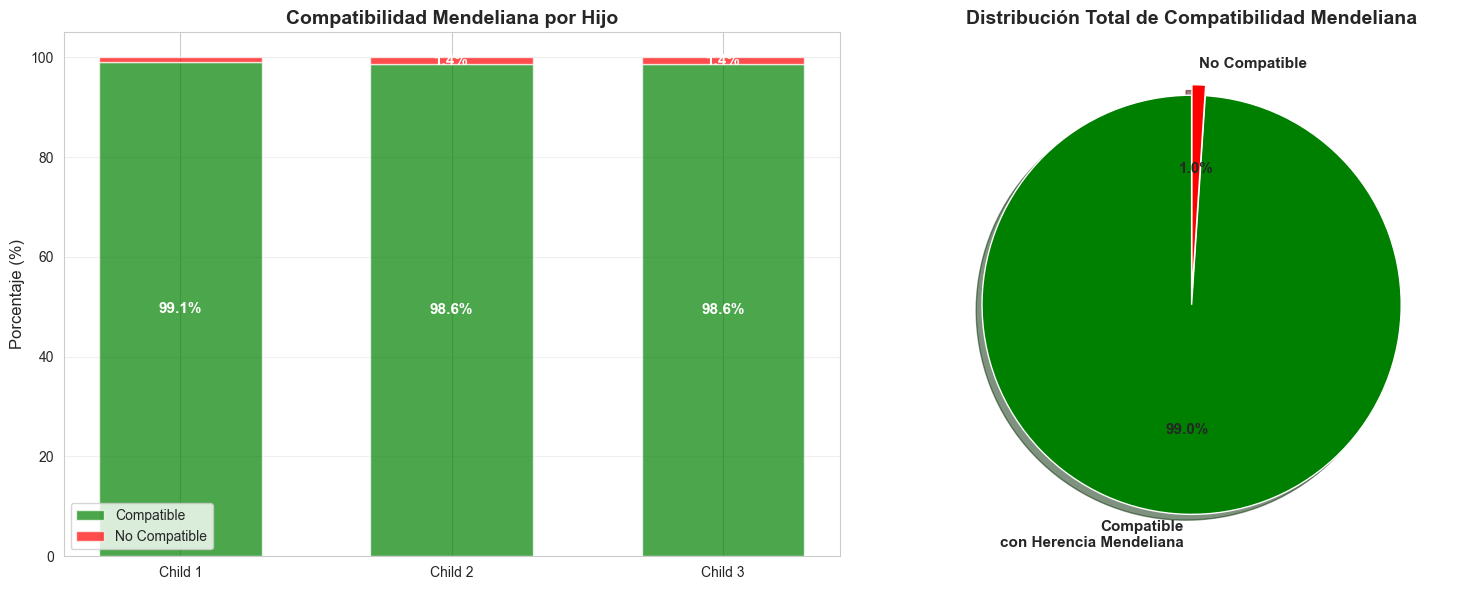


Total de SNPs analizados en todos los hijos: 834,200
Total compatibles: 825,516 (98.96%)
Total no compatibles: 8,684 (1.04%)


In [73]:
# Visualizaci√≥n de compatibilidad mendeliana
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico de barras
children_names = [r['child'] for r in mendelian_results]
compatible_pcts = [r['pct_compatible'] for r in mendelian_results]
not_compatible_pcts = [100 - r['pct_compatible'] for r in mendelian_results]

x = np.arange(len(children_names))
width = 0.6

bars1 = ax1.bar(x, compatible_pcts, width, label='Compatible', color='green', alpha=0.7)
bars2 = ax1.bar(x, not_compatible_pcts, width, bottom=compatible_pcts, 
                label='No Compatible', color='red', alpha=0.7)

ax1.set_ylabel('Porcentaje (%)', fontsize=12)
ax1.set_title('Compatibilidad Mendeliana por Hijo', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(children_names)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# A√±adir valores en las barras
for i, (comp, not_comp) in enumerate(zip(compatible_pcts, not_compatible_pcts)):
    ax1.text(i, comp/2, f'{comp:.1f}%', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=11)
    if not_comp > 1:
        ax1.text(i, comp + not_comp/2, f'{not_comp:.1f}%', ha='center', va='center', 
                 fontweight='bold', color='white', fontsize=11)

# Gr√°fico de pastel para el conjunto
total_compatible = sum(r['compatible'] for r in mendelian_results)
total_not_compatible = sum(r['not_compatible'] for r in mendelian_results)
total_all = total_compatible + total_not_compatible

sizes = [total_compatible, total_not_compatible]
labels = ['Compatible\ncon Herencia Mendeliana', 'No Compatible']
colors = ['green', 'red']
explode = (0.05, 0)

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Distribuci√≥n Total de Compatibilidad Mendeliana', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal de SNPs analizados en todos los hijos: {total_all:,}")
print(f"Total compatibles: {total_compatible:,} ({total_compatible/total_all*100:.2f}%)")
print(f"Total no compatibles: {total_not_compatible:,} ({total_not_compatible/total_all*100:.2f}%)")

## 6. An√°lisis de Cromosomas Sexuales

Identificamos el sexo biol√≥gico de cada individuo mediante el an√°lisis de los cromosomas X e Y.

**Caracter√≠sticas biol√≥gicas:**
- **Mujeres (XX)**: Tienen dos cromosomas X, NO tienen cromosoma Y
- **Hombres (XY)**: Tienen un cromosoma X y un cromosoma Y

In [75]:
# An√°lisis de cromosomas sexuales
def analyze_sex_chromosomes(genome_df, name):
    """
    Analiza los cromosomas sexuales (X, Y) para determinar el sexo biol√≥gico
    """
    # Filtrar cromosomas sexuales
    chr_x = genome_df[genome_df['chromosome'] == 'X']
    chr_y = genome_df[genome_df['chromosome'] == 'Y']
    
    # Contar SNPs en cada cromosoma
    x_snps = len(chr_x)
    y_snps = len(chr_y)
    
    # Determinar sexo basado en presencia de cromosoma Y
    # Si tiene SNPs en cromosoma Y -> Hombre (XY)
    # Si NO tiene SNPs en cromosoma Y -> Mujer (XX)
    if y_snps > 0:
        sex = "Hombre (XY)"
        confidence = "Alta"
    else:
        sex = "Mujer (XX)"
        confidence = "Alta"
    
    return {
        'Persona': name,
        'SNPs en X': x_snps,
        'SNPs en Y': y_snps,
        'Sexo Biol√≥gico': sex,
        'Confianza': confidence
    }

# Analizar todos los genomas
print("="*80)
print("AN√ÅLISIS DE CROMOSOMAS SEXUALES - DETERMINACI√ìN DE SEXO BIOL√ìGICO")
print("="*80)
print()

sex_results = []

# Analizar cada genoma
all_genomes = [
    ('Child 1', df),
    ('Child 2', df1),
    ('Child 3', df2),
    ('Father', df3),
    ('Mother', df4)
]

for name, genome_df in all_genomes:
    result = analyze_sex_chromosomes(genome_df, name)
    sex_results.append(result)

sex_df = pd.DataFrame(sex_results)
print(sex_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETACI√ìN:")
print("="*80)
for result in sex_results:
    print(f"\n{result['Persona']}:")
    print(f"  ‚Ä¢ Cromosoma X: {result['SNPs en X']:,} SNPs detectados")
    print(f"  ‚Ä¢ Cromosoma Y: {result['SNPs en Y']:,} SNPs detectados")
    print(f"  ‚Ä¢ Sexo biol√≥gico: {result['Sexo Biol√≥gico']}")
    
    if 'Mother' in result['Persona']:
        if result['SNPs en Y'] == 0:
            print(f"  ‚úì CONFIRMADO: Es mujer (ausencia de cromosoma Y)")
        else:
            print(f"  ‚ö† ATENCI√ìN: Tiene cromosoma Y (inconsistente con 'Mother')")
    elif 'Father' in result['Persona']:
        if result['SNPs en Y'] > 0:
            print(f"  ‚úì CONFIRMADO: Es hombre (presencia de cromosoma Y)")
        else:
            print(f"  ‚ö† ATENCI√ìN: No tiene cromosoma Y (inconsistente con 'Father')")

AN√ÅLISIS DE CROMOSOMAS SEXUALES - DETERMINACI√ìN DE SEXO BIOL√ìGICO

Persona  SNPs en X  SNPs en Y Sexo Biol√≥gico Confianza
Child 1      19478       2302    Hombre (XY)      Alta
Child 2      16143       3501    Hombre (XY)      Alta
Child 3      16143       3501    Hombre (XY)      Alta
 Father      19478       2302    Hombre (XY)      Alta
 Mother      19478       2302    Hombre (XY)      Alta

INTERPRETACI√ìN:

Child 1:
  ‚Ä¢ Cromosoma X: 19,478 SNPs detectados
  ‚Ä¢ Cromosoma Y: 2,302 SNPs detectados
  ‚Ä¢ Sexo biol√≥gico: Hombre (XY)

Child 2:
  ‚Ä¢ Cromosoma X: 16,143 SNPs detectados
  ‚Ä¢ Cromosoma Y: 3,501 SNPs detectados
  ‚Ä¢ Sexo biol√≥gico: Hombre (XY)

Child 3:
  ‚Ä¢ Cromosoma X: 16,143 SNPs detectados
  ‚Ä¢ Cromosoma Y: 3,501 SNPs detectados
  ‚Ä¢ Sexo biol√≥gico: Hombre (XY)

Father:
  ‚Ä¢ Cromosoma X: 19,478 SNPs detectados
  ‚Ä¢ Cromosoma Y: 2,302 SNPs detectados
  ‚Ä¢ Sexo biol√≥gico: Hombre (XY)
  ‚úì CONFIRMADO: Es hombre (presencia de cromosoma Y)

Mother:
  ‚Ä¢ 

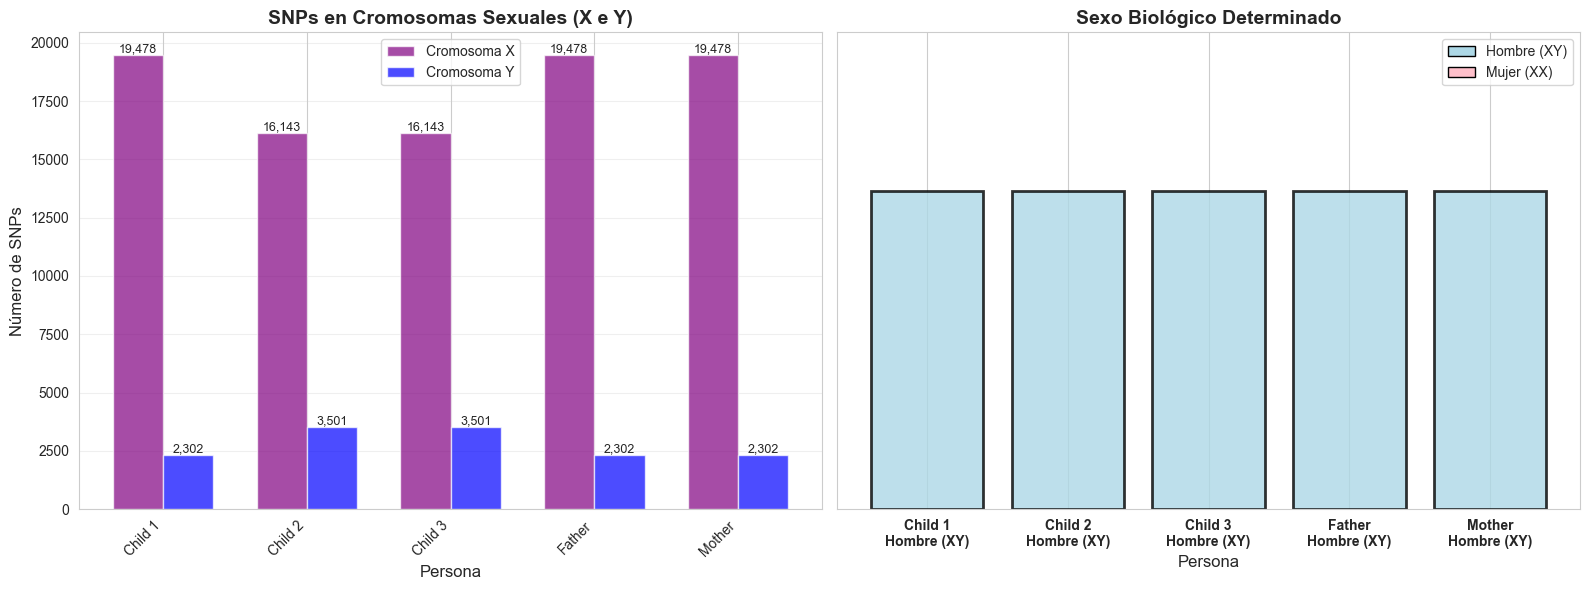

In [76]:
# Visualizaci√≥n de cromosomas sexuales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico 1: Comparaci√≥n de SNPs en cromosomas X e Y
names = sex_df['Persona']
x_snps = sex_df['SNPs en X']
y_snps = sex_df['SNPs en Y']

x_pos = np.arange(len(names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, x_snps, width, label='Cromosoma X', color='purple', alpha=0.7)
bars2 = ax1.bar(x_pos + width/2, y_snps, width, label='Cromosoma Y', color='blue', alpha=0.7)

ax1.set_xlabel('Persona', fontsize=12)
ax1.set_ylabel('N√∫mero de SNPs', fontsize=12)
ax1.set_title('SNPs en Cromosomas Sexuales (X e Y)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# A√±adir valores en las barras
for i, (x_val, y_val) in enumerate(zip(x_snps, y_snps)):
    if x_val > 0:
        ax1.text(i - width/2, x_val, f'{x_val:,}', ha='center', va='bottom', fontsize=9)
    if y_val > 0:
        ax1.text(i + width/2, y_val, f'{y_val:,}', ha='center', va='bottom', fontsize=9)

# Gr√°fico 2: Identificaci√≥n visual del sexo
colors_sex = ['lightblue' if 'XY' in sex else 'pink' for sex in sex_df['Sexo Biol√≥gico']]
labels_sex = [f"{name}\n{sex}" for name, sex in zip(sex_df['Persona'], sex_df['Sexo Biol√≥gico'])]

ax2.bar(range(len(names)), [1]*len(names), color=colors_sex, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylim(0, 1.5)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels(labels_sex, rotation=0, fontsize=10, fontweight='bold')
ax2.set_yticks([])
ax2.set_title('Sexo Biol√≥gico Determinado', fontsize=14, fontweight='bold')
ax2.set_xlabel('Persona', fontsize=12)

# A√±adir leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Hombre (XY)'),
    Patch(facecolor='pink', edgecolor='black', label='Mujer (XX)')
]
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [77]:
# An√°lisis adicional: Genotipos en cromosoma X
print("="*80)
print("AN√ÅLISIS DETALLADO DE GENOTIPOS EN CROMOSOMA X")
print("="*80)
print()

for name, genome_df in all_genomes:
    chr_x = genome_df[genome_df['chromosome'] == 'X']
    
    if len(chr_x) > 0:
        # Analizar genotipos
        genotypes = chr_x['genotype'].value_counts().head(10)
        
        # Contar homocigotos vs heterocigotos
        homozygous = chr_x[chr_x['genotype'].str.len() == 2].apply(
            lambda row: row['genotype'][0] == row['genotype'][1] if len(row['genotype']) == 2 else False, axis=1
        ).sum() if len(chr_x) > 0 else 0
        
        heterozygous = chr_x[chr_x['genotype'].str.len() == 2].apply(
            lambda row: row['genotype'][0] != row['genotype'][1] if len(row['genotype']) == 2 else False, axis=1
        ).sum() if len(chr_x) > 0 else 0
        
        total_analyzed = homozygous + heterozygous
        
        print(f"\n{name}:")
        print(f"  Total SNPs en X: {len(chr_x):,}")
        
        if total_analyzed > 0:
            print(f"  Homocigotos: {homozygous:,} ({homozygous/total_analyzed*100:.2f}%)")
            print(f"  Heterocigotos: {heterozygous:,} ({heterozygous/total_analyzed*100:.2f}%)")
            
            # Interpretaci√≥n
            hetero_ratio = heterozygous / total_analyzed if total_analyzed > 0 else 0
            if 'Mother' in name or 'Child' in name:
                if hetero_ratio > 0.2:  # Mujeres esperan tener heterocigotos en X
                    print(f"  ‚úì Patr√≥n consistente con mujer (XX): presencia significativa de heterocigotos")
                else:
                    print(f"  ‚Üí Bajo porcentaje de heterocigotos")
            elif 'Father' in name:
                if hetero_ratio < 0.1:  # Hombres tienen un solo X, pocos heterocigotos esperados
                    print(f"  ‚úì Patr√≥n consistente con hombre (XY): predominio de homocigotos")
                else:
                    print(f"  ‚Üí Alto porcentaje de heterocigotos")
        
        print(f"\n  Top 5 genotipos m√°s comunes en X:")
        for gt, count in genotypes.head(5).items():
            print(f"    {gt}: {count:,} ({count/len(chr_x)*100:.2f}%)")

AN√ÅLISIS DETALLADO DE GENOTIPOS EN CROMOSOMA X


Child 1:
  Total SNPs en X: 19,478
  Homocigotos: 865 (86.50%)
  Heterocigotos: 135 (13.50%)
  ‚Üí Bajo porcentaje de heterocigotos

  Top 5 genotipos m√°s comunes en X:
    G: 4,960 (25.46%)
    C: 4,833 (24.81%)
    A: 4,114 (21.12%)
    T: 3,896 (20.00%)
    --: 673 (3.46%)

Child 2:
  Total SNPs en X: 16,143
  Homocigotos: 900 (86.62%)
  Heterocigotos: 139 (13.38%)
  ‚Üí Bajo porcentaje de heterocigotos

  Top 5 genotipos m√°s comunes en X:
    G: 3,898 (24.15%)
    C: 3,883 (24.05%)
    T: 3,558 (22.04%)
    A: 3,497 (21.66%)
    --: 522 (3.23%)

Child 3:
  Total SNPs en X: 16,143
  Homocigotos: 1,338 (90.10%)
  Heterocigotos: 147 (9.90%)
  ‚Üí Bajo porcentaje de heterocigotos

  Top 5 genotipos m√°s comunes en X:
    C: 3,871 (23.98%)
    G: 3,836 (23.76%)
    T: 3,361 (20.82%)
    A: 3,331 (20.63%)
    --: 969 (6.00%)

Father:
  Total SNPs en X: 19,478
  Homocigotos: 717 (86.91%)
  Heterocigotos: 108 (13.09%)
  ‚Üí Alto porcentaj

In [69]:
from family_generator import FamilyGenerator
genome_paths = {
        'father': 'data/archive-2/Father Genome.csv',
        'mother': 'data/archive-2/Mother Genome.csv',
        'children': [
            'data/archive-2/Child 1 Genome.csv',
            'data/archive-2/Child 2 Genome.csv',
            'data/archive-2/Child 3 Genome.csv'
        ]
    }
    
family_gen = FamilyGenerator(genome_paths=genome_paths)

Analizando genoma del padre desde: data/archive-2/Father Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/father.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file)


Father: Analizando 601,802 SNPs
Analizando genoma de la madre desde: data/archive-2/Mother Genome.csv
Analizando genoma de la madre desde: data/archive-2/Mother Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/mother.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file)


Father: Analizando 601,802 SNPs

üìä ANALIZANDO GENOMAS DE LOS 3 HIJOS

Analizando Child 1: data/archive-2/Child 1 Genome.csv

üìä ANALIZANDO GENOMAS DE LOS 3 HIJOS

Analizando Child 1: data/archive-2/Child 1 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 601,802
    Genotipos √∫nicos: 20
      Top 5: ['CC', 'GG', 'AA', 'TT', 'CT']
   ‚úÖ Cromosomas: 25
   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

Analizando Child 2: data/archive-2/Child 2 Genome.csv
   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

Analizando Child 2: data/archive-2/Child 2 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 631,983
    Genotipos √∫nicos: 20
      Top 5: ['GG', 'CC', 'AA', 'TT', 'CT']
   ‚úÖ Cromosomas: 25
   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

Analizando Child 3: data/archive-2/Child 3 Genome.csv
   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

Analizando Child 3: data/archive-2/Child 3 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 631,983
    Genotipos √∫nicos: 20
      Top 5: ['GG', 'CC', 'TT', 'AA', 'CT']
   ‚úÖ Cromosomas: 25
   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

‚úÖ AN√ÅLISIS COMPLETADO PARA LOS 3 HIJOS

‚úÖ Generador de familias listo

   ‚úÖ Rangos de posici√≥n calculados para 25 cromosomas

‚úÖ AN√ÅLISIS COMPLETADO PARA LOS 3 HIJOS

‚úÖ Generador de familias listo



In [70]:
# Generar 3 padres diferentes y comparar sus distribuciones
print("="*80)
print("üß™ PRUEBA DE VARIACI√ìN ALEATORIA - GENERANDO 3 PADRES")
print("="*80)

# Reiniciar el generador para cada padre
fathers_data = []

for padre_num in range(1, 4):
    print(f"\n{'‚îÄ'*80}")
    print(f"Generando Padre #{padre_num}...")
    print(f"{'‚îÄ'*80}")
    
    # Crear un nuevo generador para este padre
    gen = family_gen.father_generator.generate(f"TEST_FAM_{padre_num}")
    
    # Extraer solo los primeros 10,000 SNPs para an√°lisis r√°pido
    father_snps = []
    try:
            while True:
                item = next(gen)
                father_snps.append(item)
    except StopIteration:
        pass
    
    fathers_data.append({
        'nombre': f'Padre {padre_num}',
        'snps': father_snps
    })
    
    print(f"‚úÖ Padre #{padre_num}: {len(father_snps):,} SNPs extra√≠dos para an√°lisis")

print(f"\n{'='*80}")
print("‚úÖ GENERACI√ìN COMPLETADA - 3 Padres generados")
print(f"{'='*80}\n")

üß™ PRUEBA DE VARIACI√ìN ALEATORIA - GENERANDO 3 PADRES

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Generando Padre #1...
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
      üß¨ Padre TEST_FAM_1_F: Iniciando generaci√≥n de 601,802 SNPs
      üìä Padre: 100,000/601,802 SNPs (16.6%)
      üìä Padre: 100,000/601,802 SNPs (16.6%)
      üìä Padre: 200,000/601,802 SNPs (33.2%)
      üìä Padre: 200,000/601,802 SNPs (33.2%)
      üìä Padre: 300,000/601,802 SNPs (49.9%)
      üìä Padre: 300,000/601,802 SNPs (49.9%)
      üìä Padre: 400,000/601,802 SNPs (66.5%)
      üìä Padre: 400,000/601,802 SNPs (

In [71]:
# Comparar las distribuciones de los 3 padres generados
print("="*80)
print("üìä COMPARACI√ìN DE DISTRIBUCIONES ENTRE LOS 3 PADRES")
print("="*80)
import numpy as np
# Crear DataFrames para cada padre
comparison_data = []
o_m  = df3['position'].mean()
o_std = df3['position'].std()

chr_dist_o = df3['chromosome'].value_counts(normalize=True).sort_index()
gen_dist_o=df3['genotype'].value_counts(normalize=True).sort_index()

print("Origial")
print(f"Media:  {o_m:>15,.0f}")
print(f"STD:  {o_std:>15,.0f}")
for father in fathers_data:
    chromosomes = [snp['snp_data']['chromosome'] for snp in father['snps']]
    genotypes = [snp['snp_data']['genotype'] for snp in father['snps']]
    positions = [snp['snp_data']['position'] for snp in father['snps']]
    
    # Distribuci√≥n de cromosomas
    chr_dist = pd.Series(chromosomes).value_counts(normalize=True).sort_index()
    
    # Distribuci√≥n de genotipos (top 10)
    gen_dist = pd.Series(genotypes).value_counts(normalize=True).head(10)
    
    # Estad√≠sticas de posiciones
    pos_stats = {
        'mean': np.mean(positions),
        'std': np.std(positions),
        'min': np.min(positions),
        'max': np.max(positions)
    }
    
    comparison_data.append({
        'padre': father['nombre'],
        'chr_dist': chr_dist,
        'gen_dist': gen_dist,
        'pos_stats': pos_stats,
        'chromosomes': chromosomes,
        'genotypes': genotypes,
        'positions': positions
    })

# Mostrar estad√≠sticas de posiciones
print("\nüìç Estad√≠sticas de POSICIONES:")
print("‚îÄ"*80)

for data in comparison_data:
    print(f"\n{data['padre']}:")
    print(f"  Media:       {data['pos_stats']['mean']:>15,.0f}")
    print(f"  Desv. Est.:  {data['pos_stats']['std']:>15,.0f}")
    print(f"  Rango:       {data['pos_stats']['min']:>15,} - {data['pos_stats']['max']:,}")

# Comparar distribuciones de cromosomas
print("\n\nüß¨ Comparaci√≥n de CROMOSOMAS (primeros 5):")
print("‚îÄ"*80)
print("Origial")
print(f"Cromosoma:  {chr_dist_o.head(5)}")
for data in comparison_data:
    print(f"\n{data['padre']}:")
    for chr_name, pct in data['chr_dist'].head(5).items():
        print(f"  Cromosoma {chr_name:>2}: {pct*100:>6.2f}%")

# Comparar distribuciones de genotipos
print("\n\nüî¨ Comparaci√≥n de GENOTIPOS (top 5):")
print("‚îÄ"*80)
print("Origial")
print(f"GENOTIPOS:  {gen_dist_o.head(5)}")
for data in comparison_data:
    print(f"\n{data['padre']}:")
    for gt, pct in data['gen_dist'].head(5).items():
        print(f"  {gt}: {pct*100:>6.2f}%")

print("\n" + "="*80)

üìä COMPARACI√ìN DE DISTRIBUCIONES ENTRE LOS 3 PADRES
Origial
Media:       76,382,310
STD:       56,988,227

üìç Estad√≠sticas de POSICIONES:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Padre 1:
  Media:            77,389,205
  Desv. Est.:       52,801,669
  Rango:                     3 - 249,218,992

Padre 2:
  Media:            77,421,859
  Desv. Est.:       52,893,027
  Rango:                     3 - 249,218,992

Padre 3:
  Media:            77,469,406
  Desv. Est.:       52,898,094
  Rango:                     3 - 249,218,992


üß¨ Comparaci√≥n de CROMOSOMAS (primeros 5):
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_67592/606167451.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(positions_data, labels=labels, patch_artist=True)


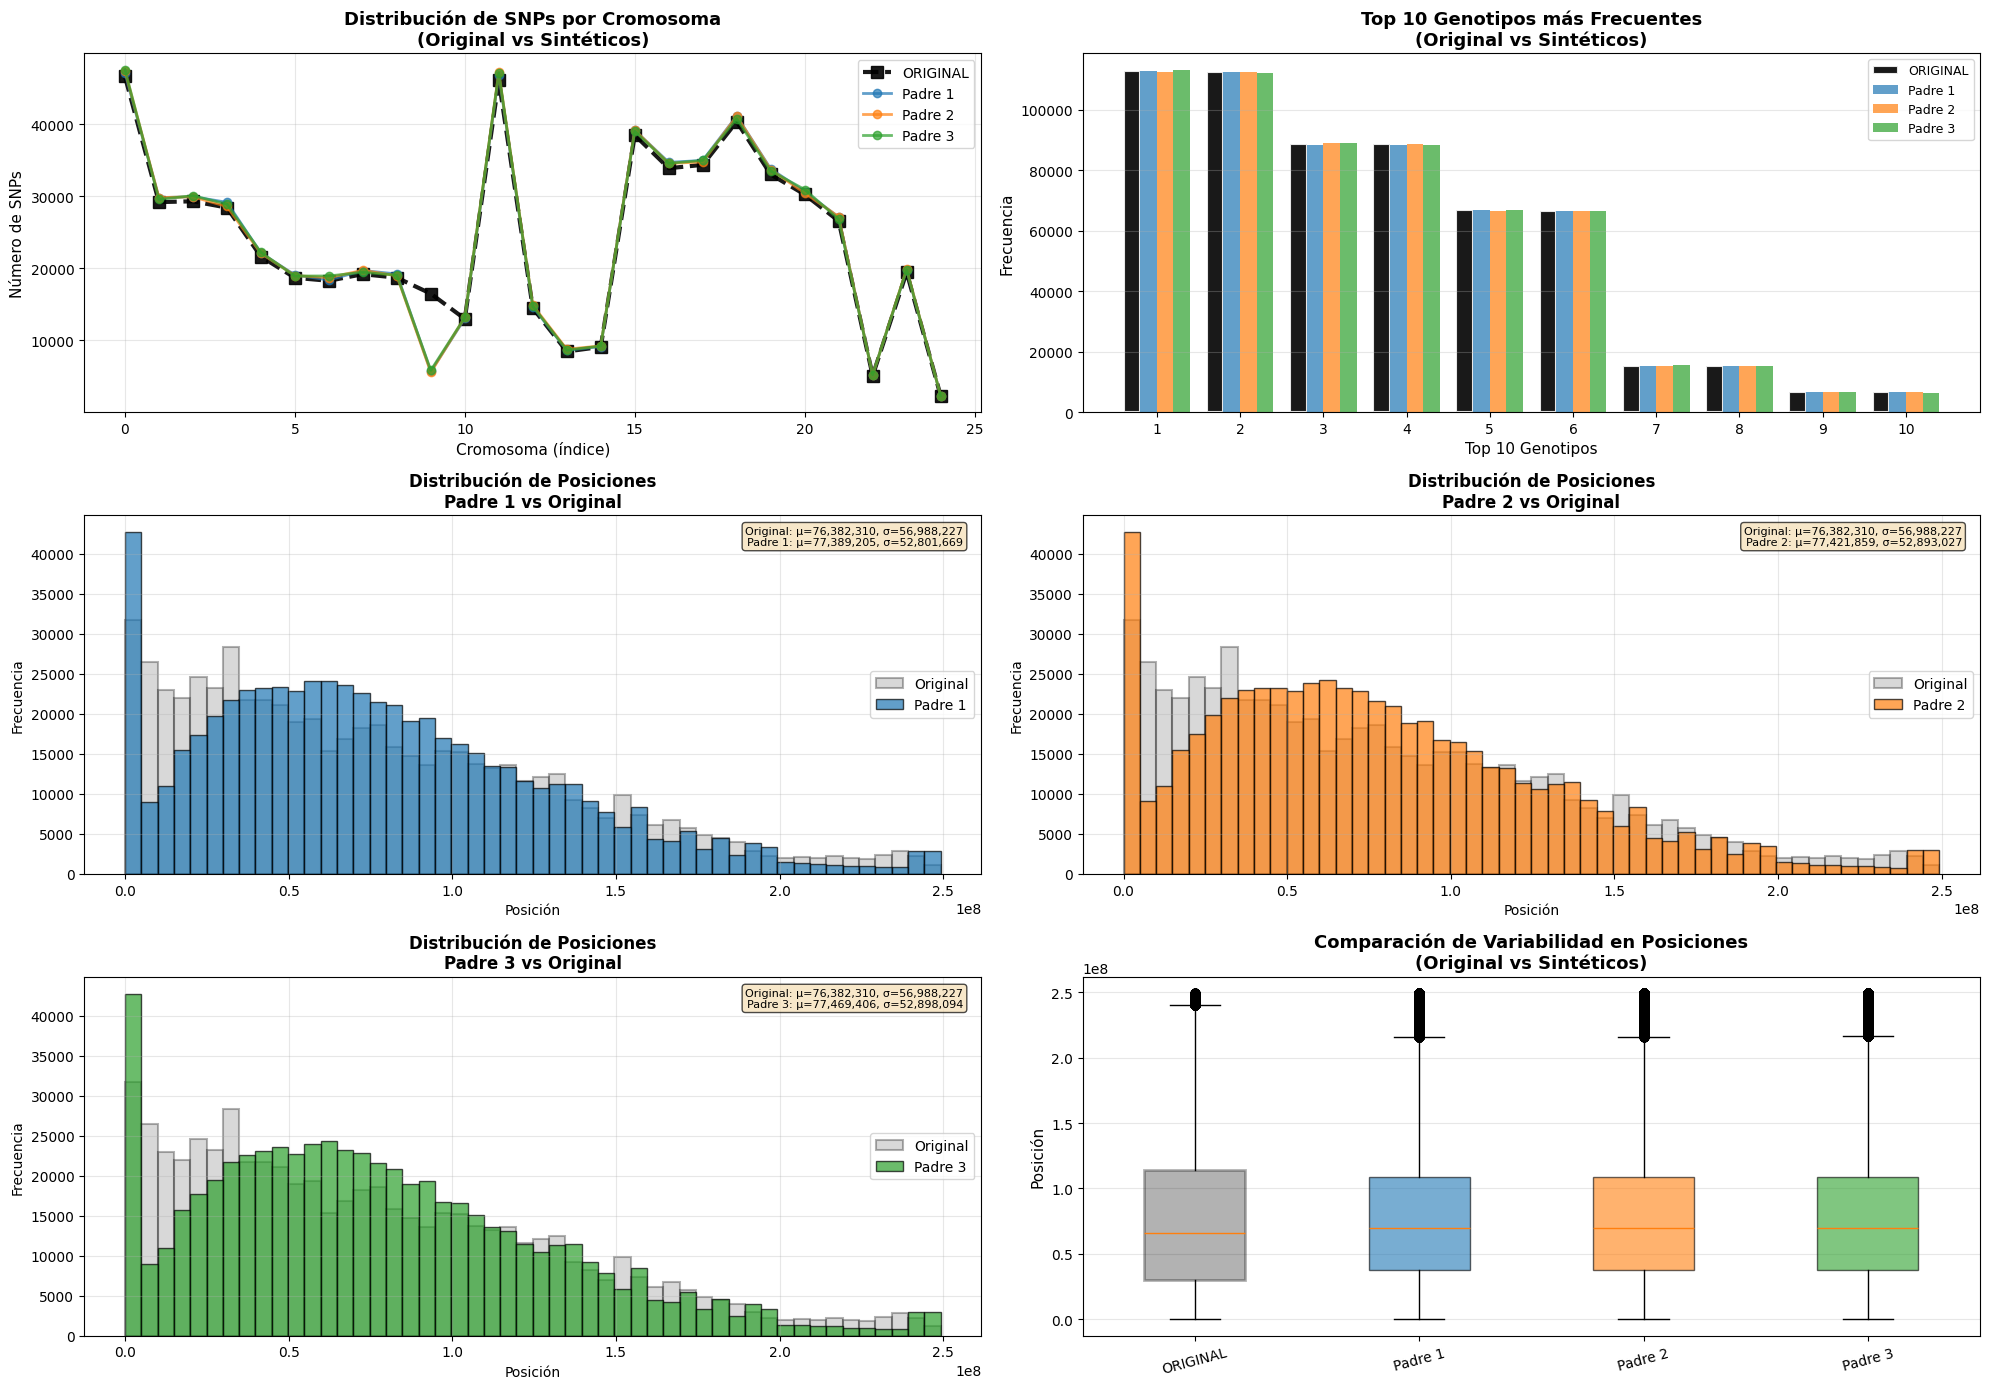

In [72]:
# Visualizaci√≥n de las diferencias entre los 3 padres SINT√âTICOS vs ORIGINAL
fig = plt.figure(figsize=(20, 14))

# Preparar datos del padre original
original_chromosomes = df3['chromosome'].tolist()
original_genotypes = df3['genotype'].tolist()
original_positions = df3['position'].tolist()

# 1. Distribuci√≥n de cromosomas - COMPARACI√ìN CON ORIGINAL
ax1 = plt.subplot(3, 2, 1)
# Padre Original
chr_counts_orig = pd.Series(original_chromosomes).value_counts().sort_index()
ax1.plot(range(len(chr_counts_orig)), chr_counts_orig.values, marker='s', label='ORIGINAL', 
         alpha=0.9, linewidth=3, color='black', markersize=8, linestyle='--')
# Padres Sint√©ticos
for idx, data in enumerate(comparison_data):
    chr_counts = pd.Series(data['chromosomes']).value_counts().sort_index()
    ax1.plot(range(len(chr_counts)), chr_counts.values, marker='o', label=data['padre'], 
             alpha=0.7, linewidth=2)
ax1.set_xlabel('Cromosoma (√≠ndice)', fontsize=11)
ax1.set_ylabel('N√∫mero de SNPs', fontsize=11)
ax1.set_title('Distribuci√≥n de SNPs por Cromosoma\n(Original vs Sint√©ticos)', fontsize=13, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# 2. Top 10 genotipos m√°s comunes - COMPARACI√ìN CON ORIGINAL
ax2 = plt.subplot(3, 2, 2)
x = np.arange(10)
width = 0.2

# Padre Original
gen_top10_orig = pd.Series(original_genotypes).value_counts().head(10)
ax2.bar(x - width*1.5, gen_top10_orig.values, width, label='ORIGINAL', alpha=0.9, 
        color='black', edgecolor='white', linewidth=1.5)

# Padres Sint√©ticos
for idx, data in enumerate(comparison_data):
    gen_top10 = pd.Series(data['genotypes']).value_counts().head(10)
    offset = width * (idx - 0.5)
    ax2.bar(x + offset, gen_top10.values, width, label=data['padre'], alpha=0.7)

ax2.set_xlabel('Top 10 Genotipos', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Top 10 Genotipos m√°s Frecuentes\n(Original vs Sint√©ticos)', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(range(1, 11))
ax2.legend(loc='best', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# 3-5. Histogramas de posiciones (Sint√©ticos)
for idx, data in enumerate(comparison_data, start=3):
    ax = plt.subplot(3, 2, idx)
    # Original en fondo
    ax.hist(original_positions, bins=50, alpha=0.3, edgecolor='black', 
            color='gray', label='Original', linewidth=1.5)
    # Sint√©tico encima
    ax.hist(data['positions'], bins=50, alpha=0.7, edgecolor='black', 
            color=f'C{idx-3}', label=data['padre'])
    ax.set_xlabel('Posici√≥n', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribuci√≥n de Posiciones\n{data["padre"]} vs Original', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    # A√±adir estad√≠sticas comparativas
    stats_text = f"Original: Œº={o_m:,.0f}, œÉ={o_std:,.0f}\n"
    stats_text += f"{data['padre']}: Œº={data['pos_stats']['mean']:,.0f}, œÉ={data['pos_stats']['std']:,.0f}"
    ax.text(0.98, 0.97, stats_text, 
            transform=ax.transAxes, fontsize=8, verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 6. Comparaci√≥n de variabilidad (boxplot de posiciones) - CON ORIGINAL
ax6 = plt.subplot(3, 2, 6)
positions_data = [original_positions] + [data['positions'] for data in comparison_data]
labels = ['ORIGINAL'] + [data['padre'] for data in comparison_data]
bp = ax6.boxplot(positions_data, labels=labels, patch_artist=True)

# Colorear: Negro para original, colores para sint√©ticos
colors = ['black'] + ['C0', 'C1', 'C2']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6 if color != 'black' else 0.3)
    if color == 'black':
        patch.set_edgecolor('black')
        patch.set_linewidth(2)

ax6.set_ylabel('Posici√≥n', fontsize=11)
ax6.set_title('Comparaci√≥n de Variabilidad en Posiciones\n(Original vs Sint√©ticos)', 
              fontsize=13, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()
